# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

Exploring the dataset with some visualisations and other metrics. Then, preparing your dataset for predictive modelling. Finally, training your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables.

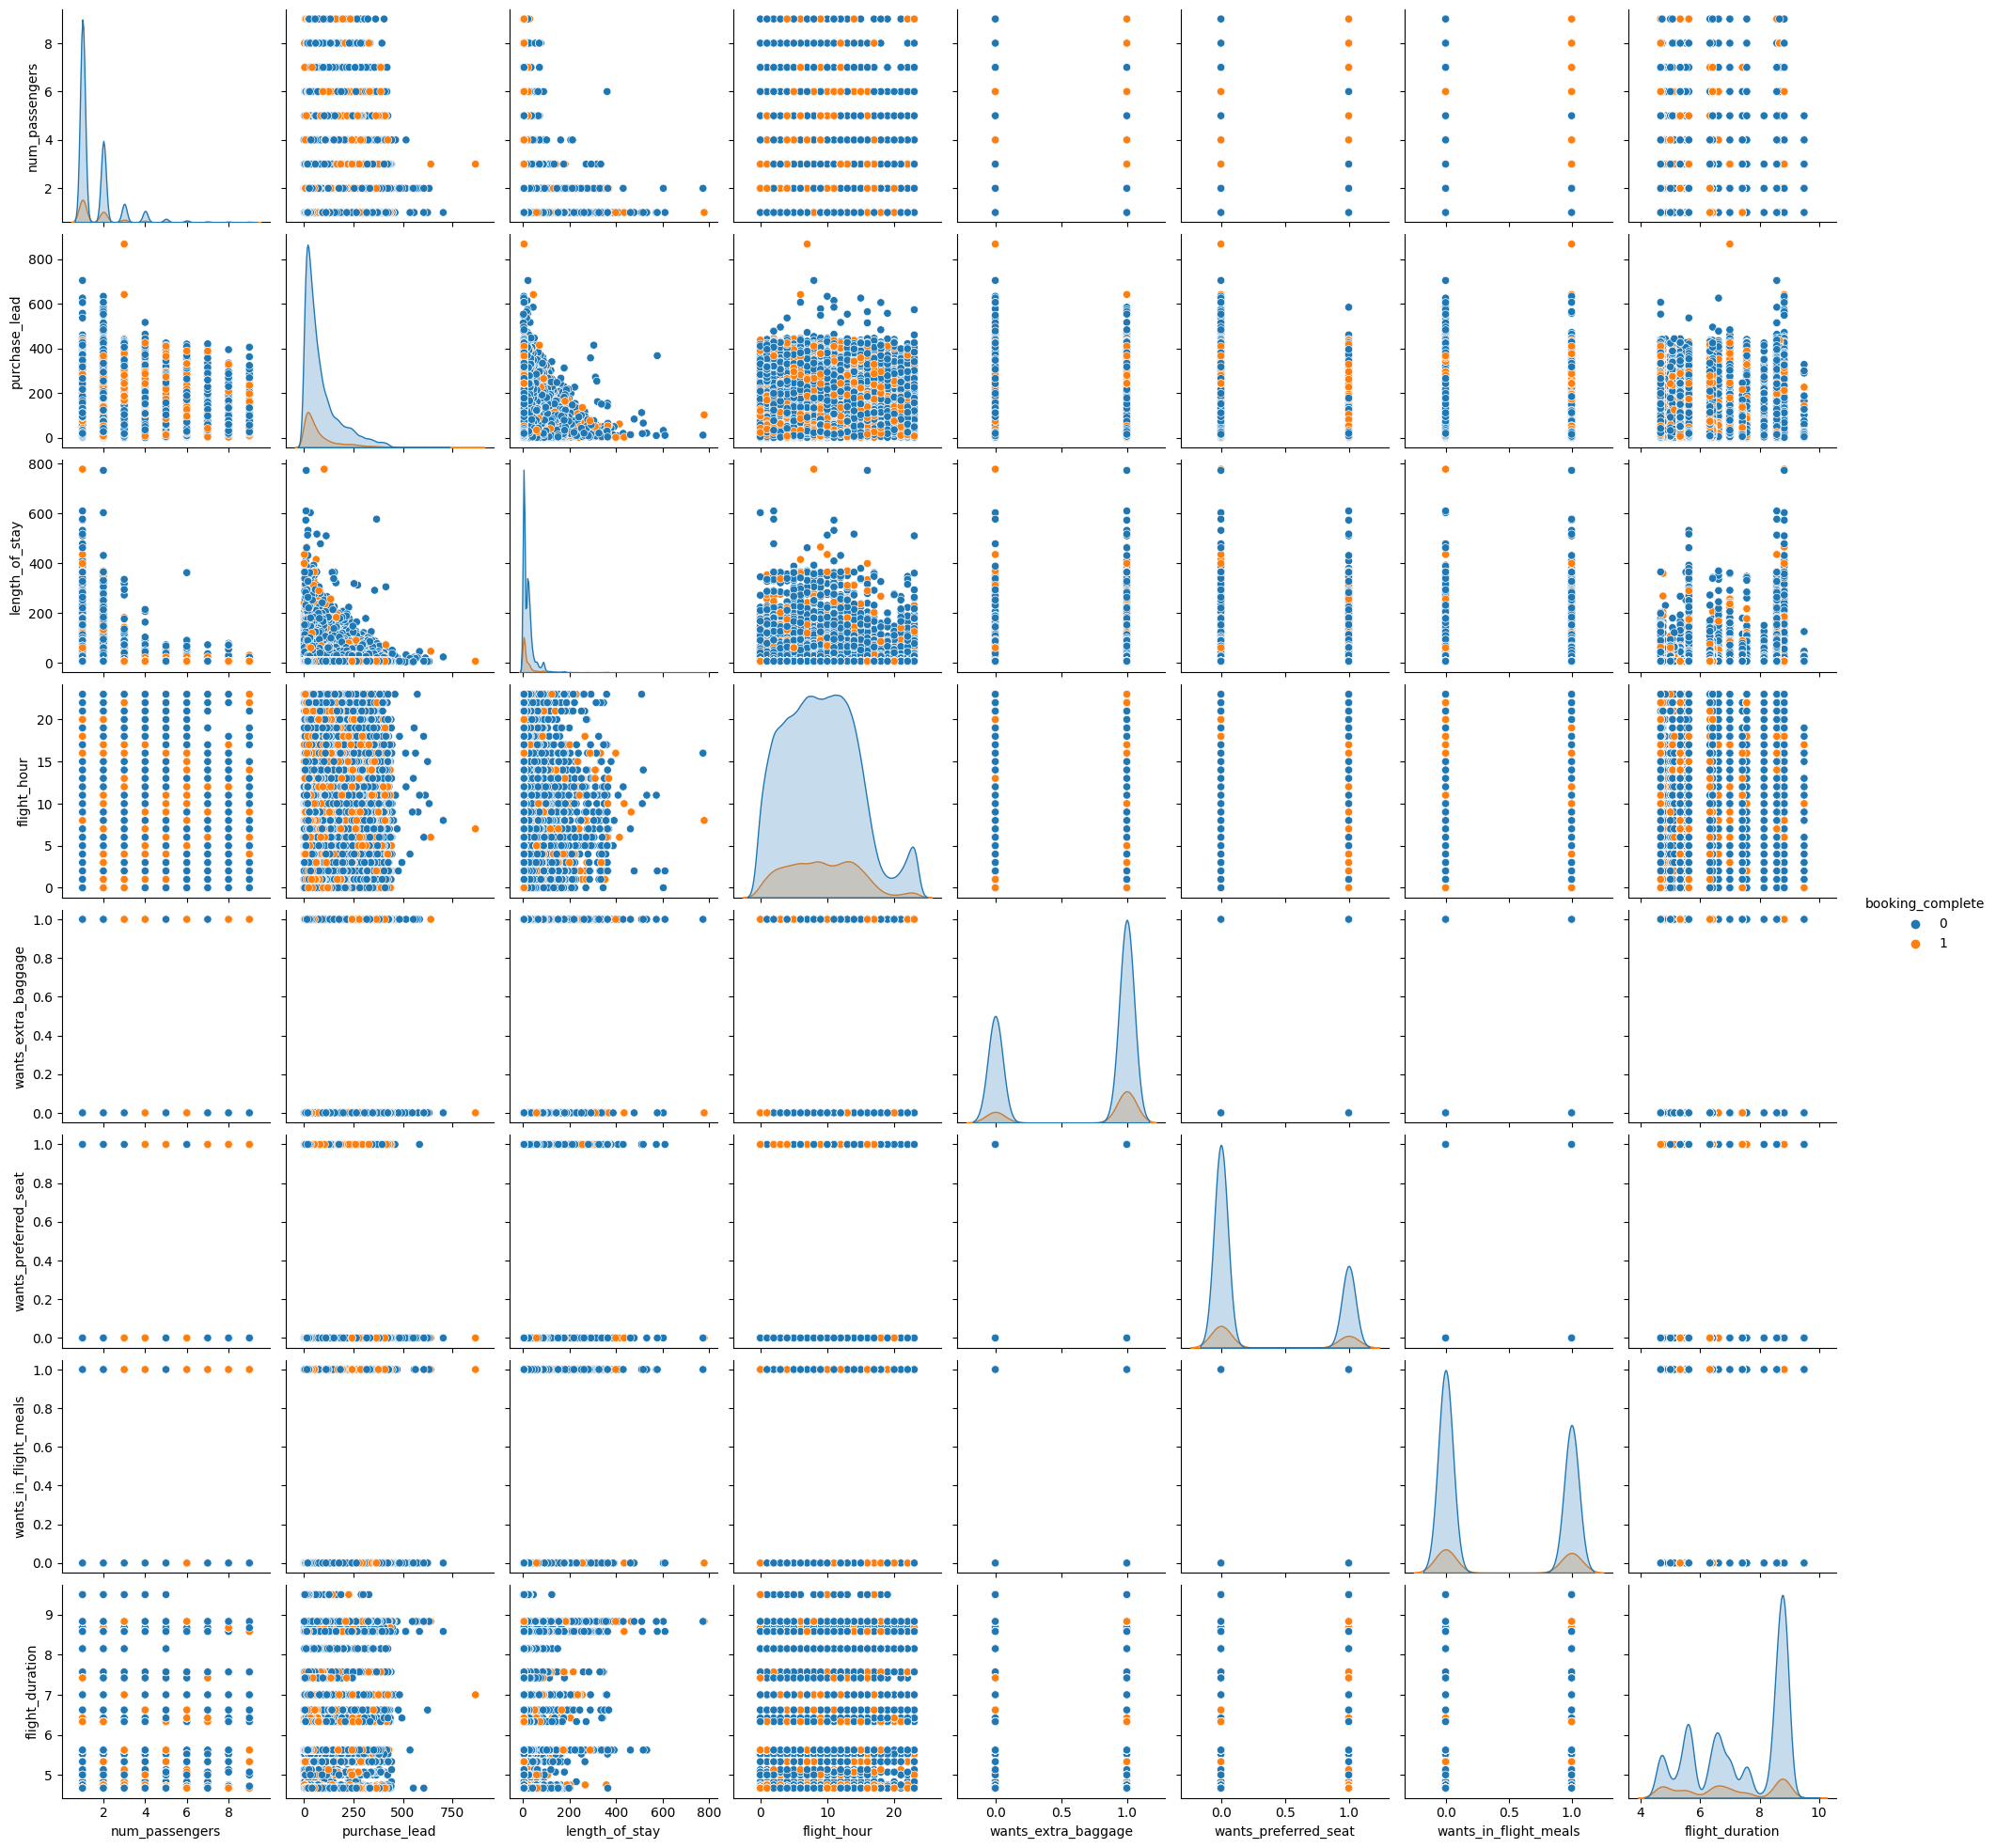

<ipython-input-7-77a8552b3bc0>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


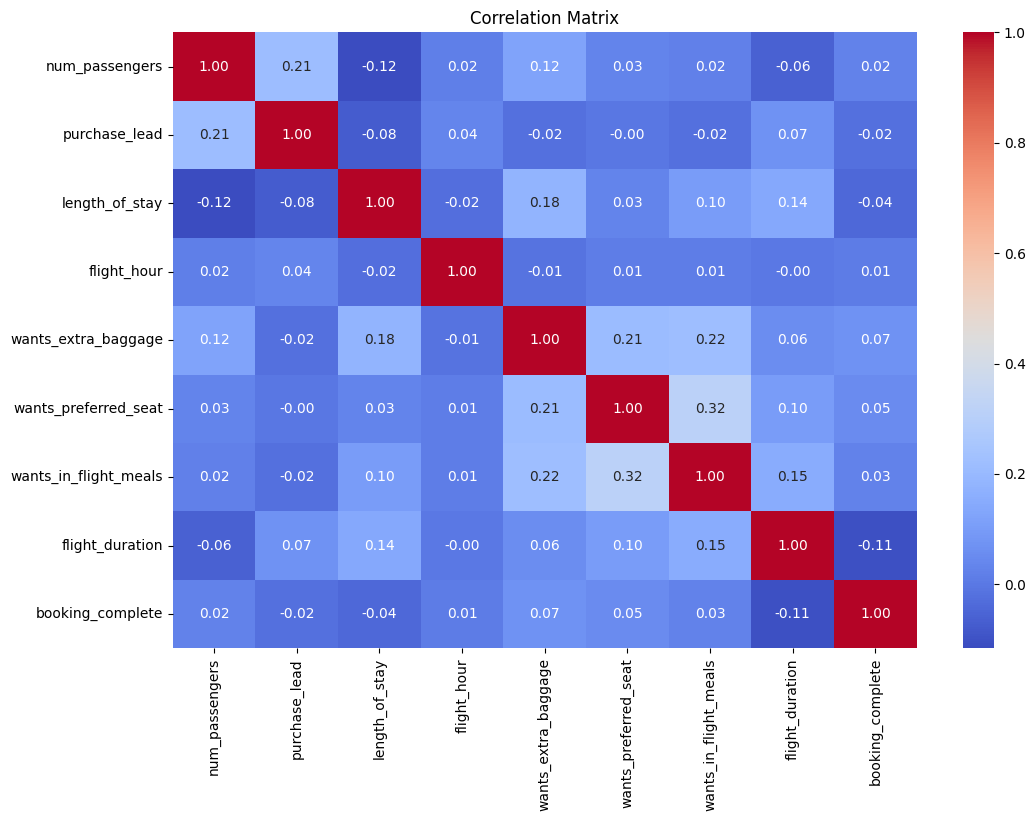

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Handling missing data (example: drop rows with missing values)
df = df.dropna()

# Visual exploration
# Pairplot for numerical variables colored by 'booking_complete'
sns.pairplot(df, hue='booking_complete')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming 'booking_origin' is the column in your DataFrame
country_counts = df['booking_origin'].value_counts()

# Convert the Series to a DataFrame for easier export
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Count']

# Export to CSV
country_counts_df.to_csv('country_counts.csv', index=False)



In [ ]:
region_mapping = {
    'South East Asia': ['Malaysia', 'Indonesia', 'Thailand', 'Vietnam', 'Philippines', 'Brunei', 'Cambodia', 'Singapore'],
    'East Asia': ['Japan', 'South Korea', 'China', 'Taiwan', 'Hong Kong', 'Macau', 'Mongolia'],
    'South Asia': ['India', 'Sri Lanka', 'Bangladesh', 'Nepal', 'Maldives', 'Bhutan'],
    'Middle East': [ 'Qatar', 'United Arab Emirates', 'Saudi Arabia', 'Iran', 'Kuwait', 'Oman', 'Israel', 'Jordan', 'Lebanon'],
    'North America': ['United States', 'Canada', 'Mexico'],
    'Europe': ['United Kingdom', 'France', 'Germany', 'Italy', 'Netherlands', 'Mauritius', 'Switzerland', 'Réunion', 'Sweden', 'Spain', 'Laos', 'Chile', 'Czech Republic', 'Belgium', 'Ireland', 'Portugal', 'Austria', 'Turkey', 'Denmark', 'Poland', 'Norway', 'Finland', 'Greece', 'Ukraine', 'Bahrain', 'Romania', 'Hungary', 'Croatia', 'Slovenia', 'Estonia', 'Cyprus', 'Czechia', 'Afghanistan', 'Bulgaria', 'Nicaragua', 'Bhutan', 'Slovakia'],
    'Nordic': ['Sweden', 'Denmark', 'Norway', 'Finland', 'Iceland'],
    'Africa': ['Kenya', 'South Africa', 'Tanzania', 'Seychelles', 'Egypt'],
    'South America': ['Brazil', 'Argentina', 'Peru', 'Colombia', 'Paraguay'],
    'Unknown': ['Map (not set)', 'Kazakhstan', 'Malta', 'Panama'],
    'Oceania': ['Australia', 'New Zealand', 'Timor-Leste', 'Guam', 'New Caledonia', 'Solomon Islands', 'Papua New Guinea', 'Norfolk Island', 'Tonga', 'Vanuatu']
}

# Map countries to regions
country_to_region = {}
for region, countries in region_mapping.items():
    for country in countries:
        country_to_region[country] = region

# Print the mapping
for country, region in country_to_region.items():
    print(f'{country}: {region}')


Malaysia: South East Asia
Indonesia: South East Asia
Thailand: South East Asia
Vietnam: South East Asia
Philippines: South East Asia
Brunei: South East Asia
Cambodia: South East Asia
Singapore: South East Asia
Japan: East Asia
South Korea: East Asia
China: East Asia
Taiwan: East Asia
Hong Kong: East Asia
Macau: East Asia
Mongolia: East Asia
India: South Asia
Sri Lanka: South Asia
Bangladesh: South Asia
Nepal: South Asia
Maldives: South Asia
Bhutan: Europe
Qatar: Middle East
United Arab Emirates: Middle East
Saudi Arabia: Middle East
Iran: Middle East
Kuwait: Middle East
Oman: Middle East
Israel: Middle East
Jordan: Middle East
Lebanon: Middle East
United States: North America
Canada: North America
Mexico: North America
United Kingdom: Europe
France: Europe
Germany: Europe
Italy: Europe
Netherlands: Europe
Mauritius: Europe
Switzerland: Europe
Réunion: Europe
Sweden: Nordic
Spain: Europe
Laos: Europe
Chile: Europe
Czech Republic: Europe
Belgium: Europe
Ireland: Europe
Portugal: Europe
A

In [ ]:
# Create a new 'region' column based on the mapping
df['region'] = df['booking_origin'].map(country_to_region)


# Duplicate 'sales_channel' and 'trip_type' columns
df['sc_duplicate'] = df['sales_channel'].copy()
df['tt_duplicate'] = df['trip_type'].copy()

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,region,sc_duplicate,tt_duplicate
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Oceania,Internet,RoundTrip
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Oceania,Internet,RoundTrip
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,South Asia,Internet,RoundTrip
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Oceania,Internet,RoundTrip
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,South Asia,Internet,RoundTrip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,Oceania,Internet,RoundTrip
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,Oceania,Internet,RoundTrip
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,Oceania,Internet,RoundTrip
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,Oceania,Internet,RoundTrip


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        class_counts = df[col].value_counts()
        print(f"Class counts for column '{col}':\n{class_counts}\n")

Class counts for column 'sales_channel':
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Class counts for column 'trip_type':
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Class counts for column 'flight_day':
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

Class counts for column 'route':
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Class counts for column 'booking_origin':
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen      

In [ ]:
# Use one-hot encoding to create binary columns for each region
df = pd.get_dummies(df, columns=['region'], prefix='booking_origin', prefix_sep='_')
df = pd.get_dummies(df, columns=['sc_duplicate'], prefix='sales_channel', prefix_sep='_')
df = pd.get_dummies(df, columns=['tt_duplicate'], prefix='trip_type', prefix_sep='_')

# Now the DataFrame has binary columns for each region
print(df.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  ...  \
0            7        Sat  AKLDEL    New Zealand                    1  ...   
1            3        Sat  AKLDEL    New Zealand                    0  ...   
2           17        Wed  AKLDEL          India                    1  ...   
3            4        Sat  AKLDEL    New Zealand                    0  ...   
4           15        Wed  AKLDEL          India                    1  ...   

   booking_origin_Oceania  booking_origin_South America  \
0        

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()

categorical_columns = [ 'sales_channel', 'route', 'booking_origin','trip_type', 'flight_day']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check for missing values and handle them if necessary
print(df.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['num_passengers', 'purchase_lead','length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

num_passengers                    0
sales_channel                     0
trip_type                         0
purchase_lead                     0
length_of_stay                    0
flight_hour                       0
flight_day                        0
route                             0
booking_origin                    0
wants_extra_baggage               0
wants_preferred_seat              0
wants_in_flight_meals             0
flight_duration                   0
booking_complete                  0
booking_origin_Africa             0
booking_origin_East Asia          0
booking_origin_Europe             0
booking_origin_Middle East        0
booking_origin_Nordic             0
booking_origin_North America      0
booking_origin_Oceania            0
booking_origin_South America      0
booking_origin_South Asia         0
booking_origin_South East Asia    0
booking_origin_Unknown            0
sales_channel_Internet            0
sales_channel_Mobile              0
trip_type_CircleTrip        

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

**Feature importance**

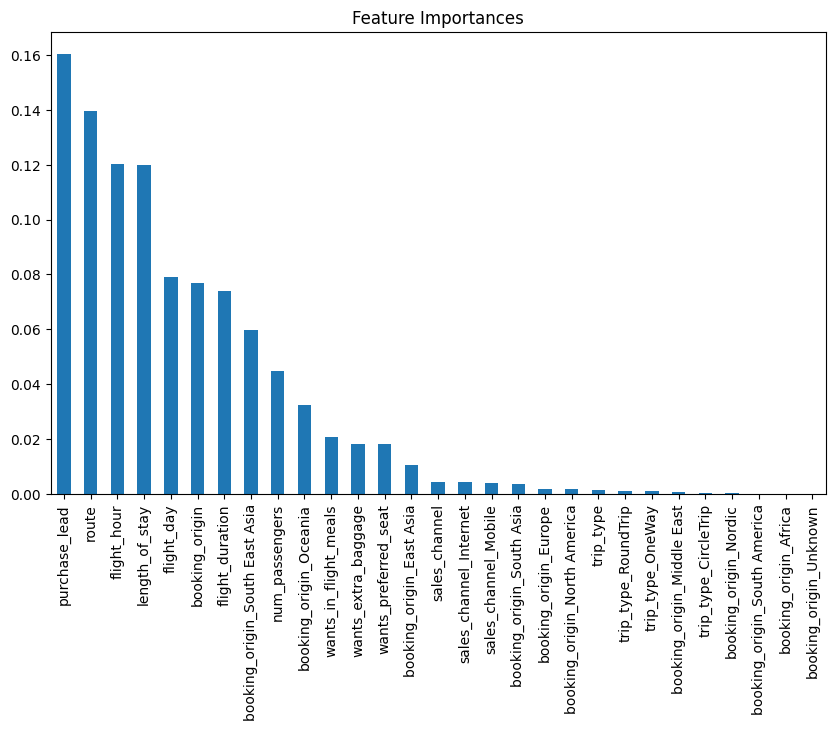

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Display feature importances for each feature
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

num_passengers: 0.04473877150707413
sales_channel: 0.004469102454833419
trip_type: 0.0015016486271443403
purchase_lead: 0.16033207136691513
length_of_stay: 0.11974267205149286
flight_hour: 0.12009112538083785
flight_day: 0.07919061808555951
route: 0.13975390317980715
booking_origin: 0.07672216349658363
wants_extra_baggage: 0.01832984582216716
wants_preferred_seat: 0.018161356378477444
wants_in_flight_meals: 0.020778850739645572
flight_duration: 0.07401223172401
booking_origin_Africa: 7.816232410234417e-05
booking_origin_East Asia: 0.010442546836404078
booking_origin_Europe: 0.0018042957984896948
booking_origin_Middle East: 0.0007772698787372166
booking_origin_Nordic: 0.0002996693065769901
booking_origin_North America: 0.001754094958468714
booking_origin_Oceania: 0.03259300329419927
booking_origin_South America: 0.00011128256663978285
booking_origin_South Asia: 0.0035036802307627252
booking_origin_South East Asia: 0.05978601503517545
booking_origin_Unknown: 3.486603622596576e-05
sales_c

In [ ]:
# Create a DataFrame with feature names and importances
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Display the DataFrame
print(df_feature_importances)

# Save the DataFrame to a CSV file
df_feature_importances.to_csv('feature_importances.csv', index=False)

                           Feature  Importance
0                   num_passengers    0.044739
1                    sales_channel    0.004469
2                        trip_type    0.001502
3                    purchase_lead    0.160332
4                   length_of_stay    0.119743
5                      flight_hour    0.120091
6                       flight_day    0.079191
7                            route    0.139754
8                   booking_origin    0.076722
9              wants_extra_baggage    0.018330
10            wants_preferred_seat    0.018161
11           wants_in_flight_meals    0.020779
12                 flight_duration    0.074012
13           booking_origin_Africa    0.000078
14        booking_origin_East Asia    0.010443
15           booking_origin_Europe    0.001804
16      booking_origin_Middle East    0.000777
17           booking_origin_Nordic    0.000300
18    booking_origin_North America    0.001754
19          booking_origin_Oceania    0.032593
20    booking

Model Result

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n{'='*50}\n")

Classifier: AdaBoost
Accuracy: 0.6925
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1522
           1       0.68      0.70      0.69      1470

    accuracy                           0.69      2992
   macro avg       0.69      0.69      0.69      2992
weighted avg       0.69      0.69      0.69      2992


Classifier: Decision Tree
Accuracy: 0.6424
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1522
           1       0.63      0.65      0.64      1470

    accuracy                           0.64      2992
   macro avg       0.64      0.64      0.64      2992
weighted avg       0.64      0.64      0.64      2992


Classifier: Random Forest
Accuracy: 0.7005
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1522
           1       0.68      0.74      0.7

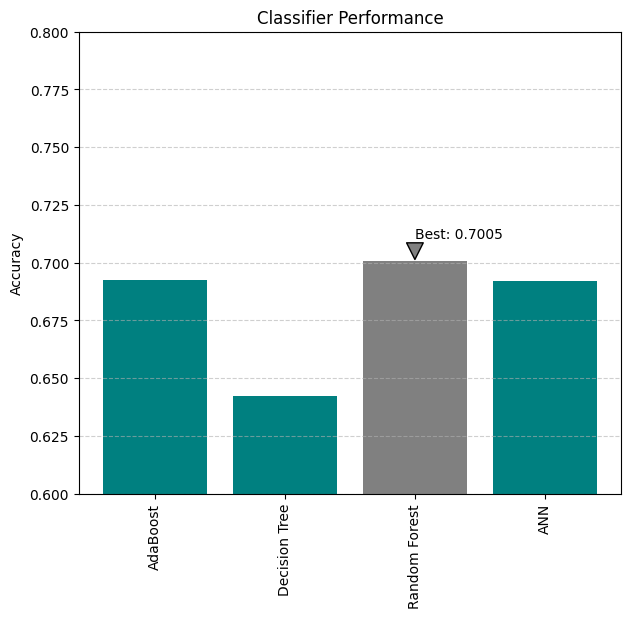

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = ['AdaBoost', 'Decision Tree', 'Random Forest', 'ANN']
accuracies = [ 0.6925, 0.6424, 0.7005, 0.6922]

# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['teal'] * len(classifiers)
colors[best_index] = 'grey'

# Create a vertical bar plot
plt.figure(figsize=(7, 6))
bars = plt.bar(classifiers, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.60, 0.8)  # Adjusted limits to better fit the Decision Tree accuracy
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Add text annotation for the best accuracy
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.01),
             arrowprops=dict(facecolor='grey', shrink=0.10))

plt.show()